## Benchmark AIM

Evaluate the newly developed CSRML version of AIM by using the original database as reference fingerprints. Only using the first 5000 sample to reduce computational time by the chemotyper. Allowed for further refinement of the chemotype file before comparing it to the entire old database.

#### QAPP ID: I-CCED-0032994-QP-1-0
#### Author: Matthew Adams
#### Principal Investigator: Grace Patlewicz
#### Last Modified May 05 2022

In [1]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

today = date.today()
day = today.strftime("%m_%d_%y")
plt.style.use('ggplot')


In [2]:
import os
import openpyxl
%matplotlib inline

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
processed_dir = TOP + 'data/processed/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'
refs_dir = TOP + 'references/'

In [4]:
orig_appendix = pd.read_excel(raw_dir+'AppendixB_AIM_465_fragments_v060718.xlsx', sheet_name = 'AppendixA_Original')

#### There are 831 rows nominally representing different fragments

In [5]:
orig_appendix = orig_appendix.iloc[:831,:3]
orig_appendix.shape

(831, 3)

#### Six of these are null - so a fragment ID tag but no associated fragment

In [6]:
orig_appendix[orig_appendix['Fragment'].isnull()].shape

(6, 3)

In [7]:
orig_appendix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fragment       825 non-null    object
 1   Number         831 non-null    object
 2   Modified Name  120 non-null    object
dtypes: object(3)
memory usage: 19.6+ KB


In [8]:
[e for e in orig_appendix['Fragment'].replace(np.nan, 'missing') if "Au" in e][3] == [e for e in orig_appendix['Fragment'].replace(np.nan, 'missing') if "Au" in e][0]

True

In [9]:
orig_appendix['Fragment'] = orig_appendix['Fragment'].replace(np.nan, 'missing')

In [23]:
orig_ids = set(orig_appendix[orig_appendix['Fragment'] != 'missing']['Number'].tolist())

In [24]:
len(orig_ids)

825

In [ ]:
orig_

In [20]:
len([e for e in list(set(orig_appendix['Fragment'])) if "missing" not in e])

787

## Load Mapped AIMDB File (Contains DTXSID)

In [45]:


df_mapped = pd.read_excel(raw_dir+'AIM_map-to-dsstox.xlsx')
df_mapped = df_mapped[['INPUT','DTXSID']]
df_mapped = df_mapped.rename(columns={'INPUT':'CASRN'})
df_mapped['CASRN'] = df_mapped['CASRN'].astype(str)
df_mapped = df_mapped.drop_duplicates(subset=['CASRN'])
print(df_mapped.shape)
df_mapped.head()

(86198, 2)


,CASRN,DTXSID
0,51218,DTXSID2020634
1,51285,DTXSID0020523
2,51296,DTXSID401018909
3,51309,DTXSID6025486
4,51343,DTXSID6023573


## Load Original AIMDB File

In [46]:
df = pd.read_csv(raw_dir+"aimdb.tsv", sep='\t', names = ['SMILES', 'CASRN', 'othwer', 'other', 'AIM Fragments'])
df['AIM_list'] = df['AIM Fragments'].apply(lambda x: x.split(','))
df = df[['SMILES','CASRN','AIM_list']]
df = df.drop_duplicates(subset=['SMILES'])
print(df.shape)
df.head()

(83277, 3)


,SMILES,CASRN,AIM_list
0,N1C(=O)NC(=O)C(F)=C1,51218,"[5, 10, 15, 43, 58, 172, 174, 176, 206, 210, 3C]"
1,N(=O)(=O)c(ccc(O)c1N(=O)(=O))c1,51285,"[19, 23, 34, 13C]"
2,Clc1c(Cl)cc(C(O)CNC(C)C)cc1,51296,"[0, 1, 2, 7, 10, 19, 21, 214, 90C]"
3,c1cc(O)c(O)cc1C(O)CN(Cl)([H])([H])C(C)C,51309,"[0, 1, 2, 7, 19, 23, 107, 127, 214]"
4,CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4,51343,"[0, 1, 2, 7, 8, 11, 19, 40, 171, 173, 174, 82C]"


#### Number of unique AIM IDs

In [48]:
len(set([e for e in df['AIM_list'] for e in e]))

767

#### Comparing fragment IDs from both the database and the original Appendix

In [63]:
aim_df_ids = set([e for e in df['AIM_list'] for e in e])

In [67]:
from matplotlib_venn import venn2

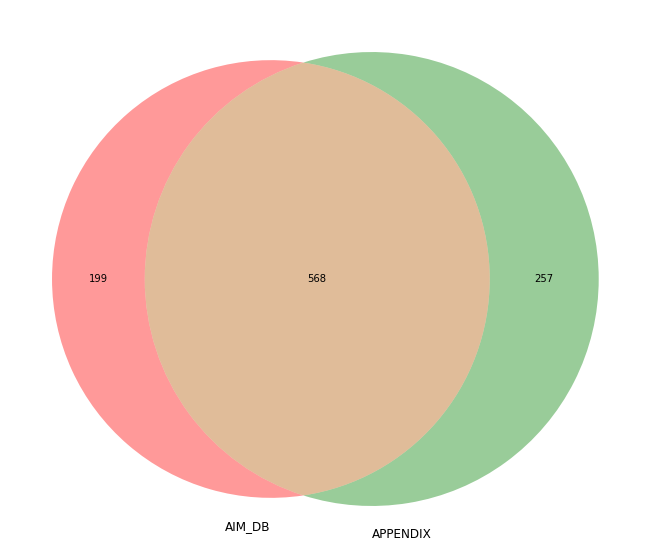

In [68]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
v = venn2([aim_df_ids, orig_ids], ('AIM_DB', 'APPENDIX'))

In [69]:
568+257

825

In [70]:
199+568

767

## Join two dataframes together into new dataframe



In [71]:
df_aimdb_dtx = pd.merge(df,df_mapped,on='CASRN',how='inner')
df_aimdb_dtx = df_aimdb_dtx[['DTXSID','CASRN','SMILES','AIM_list']]

print(df_aimdb_dtx.shape)
df_aimdb_dtx.head()

(83276, 4)


,DTXSID,CASRN,SMILES,AIM_list
0,DTXSID2020634,51218,N1C(=O)NC(=O)C(F)=C1,"[5, 10, 15, 43, 58, 172, 174, 176, 206, 210, 3C]"
1,DTXSID0020523,51285,N(=O)(=O)c(ccc(O)c1N(=O)(=O))c1,"[19, 23, 34, 13C]"
2,DTXSID401018909,51296,Clc1c(Cl)cc(C(O)CNC(C)C)cc1,"[0, 1, 2, 7, 10, 19, 21, 214, 90C]"
3,DTXSID6025486,51309,c1cc(O)c(O)cc1C(O)CN(Cl)([H])([H])C(C)C,"[0, 1, 2, 7, 19, 23, 107, 127, 214]"
4,DTXSID6023573,51343,CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4,"[0, 1, 2, 7, 8, 11, 19, 40, 171, 173, 174, 82C]"


## Load Chemotyper Fingerprint file

This fingerprint file was generated using the Chemotyper program

 Inputs: AIM CSRML File (.xml) , AIMdb SDF File (.sdf)
 
 Output: fingerprint file (.tsv)

In [72]:
df_chemotyper = pd.read_csv(raw_dir+'AIM_V1_vs_AIMdb_fulllist.tsv', sep='\t')

# Transform binary fingerprint column into list 
df_chemotyper['Chemotyper_list'] = df_chemotyper.apply(lambda x: x.index[x == 1].tolist(), axis=1)
df_chemotyper['Chemotyper_list'] = df_chemotyper['Chemotyper_list'].apply(lambda x: [s.split('_')[0]for s in x])
df_chemotyper['Chemotyper_list'] = df_chemotyper['Chemotyper_list'].apply(lambda x: list(set(x)))
df_chemotyper = df_chemotyper[['M_SMILES','Chemotyper_list']]

df_chemotyper = df_chemotyper.rename(columns={'M_SMILES':'SMILES'})
df_chemotyper = df_chemotyper.drop_duplicates(subset=['SMILES'])

print(df_chemotyper.shape)
df_chemotyper.head()

(65081, 2)


,SMILES,Chemotyper_list
0,N1C(=O)NC(=O)C(F)=C1,"[43, 5, 15, 174, 58, 10, 176, 206, 210, 172]"
1,N(=O)(=O)c(ccc(O)c1N(=O)(=O))c1,"[19, 13C, 23, 34]"
2,Clc1c(Cl)cc(C(O)CNC(C)C)cc1,"[2, 0, 1, 214, 7, 19, 10, 21, 90C]"
3,Oc1c(O)cc(C(O)CNC(C)C)cc1,"[2, 0, 23, 1, 214, 7, 19, 10, 90C]"
7,CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4,"[2, 82C, 0, 1, 174, 171, 173, 7, 19, 40, 8, 11]"


## Join the two dataframes on SMILES

This will allow us to compare the two lists of fragments:
- The original database list
- The new CSRML model list

In [73]:
df_join = pd.merge(df_aimdb_dtx,df_chemotyper,on='SMILES',how='inner')

diff_aim_chemo = []
for row in df_join.itertuples():
    combined_uniques = list(set(row.Chemotyper_list).symmetric_difference(set(row.AIM_list)))
    diff_aim_chemo.append(combined_uniques)


df_join['Difference_aim_chemo'] = diff_aim_chemo
print(df_join.shape)
df_join.head()


(65081, 6)


,DTXSID,CASRN,SMILES,AIM_list,Chemotyper_list,Difference_aim_chemo
0,DTXSID2020634,51218,N1C(=O)NC(=O)C(F)=C1,"[5, 10, 15, 43, 58, 172, 174, 176, 206, 210, 3C]","[43, 5, 15, 174, 58, 10, 176, 206, 210, 172]",[3C]
1,DTXSID0020523,51285,N(=O)(=O)c(ccc(O)c1N(=O)(=O))c1,"[19, 23, 34, 13C]","[19, 13C, 23, 34]",[]
2,DTXSID401018909,51296,Clc1c(Cl)cc(C(O)CNC(C)C)cc1,"[0, 1, 2, 7, 10, 19, 21, 214, 90C]","[2, 0, 1, 214, 7, 19, 10, 21, 90C]",[]
3,DTXSID6023573,51343,CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4,"[0, 1, 2, 7, 8, 11, 19, 40, 171, 173, 174, 82C]","[2, 82C, 0, 1, 174, 171, 173, 7, 19, 40, 8, 11]",[]
4,DTXSID10883225,51354,O=C(O)C(NCC1O)C1,"[1, 2, 7, 10, 35, 171, 174, 6C, 7C]","[2, 7C, 1, 174, 171, 7, 10, 6C, 35]",[]


With this we can find the percentage of structures which are completely matching, 

**Drawback:** structure that contains one incorrect match it is counted as incorrect regardless of the number of correctly matched chemotypes it had

In [74]:
df_mismatch = df_join[df_join['Difference_aim_chemo'].map(lambda d: len(d)) > 0]
full_match = 1 -(len(df_mismatch)/len(df_join))

print(f'Complete Match: {100*full_match:4.2f}%')

Complete Match: 76.09%


In [75]:
#df_mismatch.to_csv(f'Outputs/chemo_aim_mismatches_smiles_{day}.csv')
print(df_mismatch.shape)


(15562, 6)


## Evaluating the performance of the individual fragments

Next we want to evaluate the performance of each individual fragment.

To do so, we get the  TP, TN, FP, FN values of each fragment to calculate individual evaluation metrics


In [76]:
# May Take a few minutes to run
df_join['Number_different'] = df_join['Difference_aim_chemo'].apply(lambda x: len(x))

df_sub = df_join.copy()

fragments = []
for row in df_sub["AIM_list"]:  
    for fragment in row:
        fragments.append(fragment)

fragments = list(set(fragments))
total_rows = df_sub.shape[0]
diffs = []

for i in fragments:
    selection = [i]
    aim_mask = df_sub['AIM_list'].apply(lambda x: any(item for item in selection if item in x))
    df_aim = df_sub[aim_mask]
    chemo_mask = df_sub['Chemotyper_list'].apply(lambda x: any(item for item in selection if item in x))
    TP = df_aim[chemo_mask].shape[0]  #Both AIM and Chemo (TP)
   
    
    err_mask = df_sub['Difference_aim_chemo'].apply(lambda x: any(item for item in selection if item in x))
    df_diff = df_sub[err_mask]  #Total number of errors (FN,FP)
    
    avg_err = np.round(df_diff.iloc[:,-1].mean(),2) #number of totalmismatches in structures which contain a mismatch with selection
    diff_total = df_diff.shape[0]
    chemo_mask = df_diff['Chemotyper_list'].apply(lambda x: any(item for item in selection if item in x))
    
    FP = df_diff[chemo_mask].shape[0]
    FN = diff_total - FP
    TN = total_rows - (FP+FN+TP)
    diffs.append([TP,FP,FN,TN,avg_err])
    
    
df_sub.head()

<ipython-input-76-6f2c33426ad4>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  TP = df_aim[chemo_mask].shape[0]  #Both AIM and Chemo (TP)


,DTXSID,CASRN,SMILES,AIM_list,Chemotyper_list,Difference_aim_chemo,Number_different
0,DTXSID2020634,51218,N1C(=O)NC(=O)C(F)=C1,"[5, 10, 15, 43, 58, 172, 174, 176, 206, 210, 3C]","[43, 5, 15, 174, 58, 10, 176, 206, 210, 172]",[3C],1
1,DTXSID0020523,51285,N(=O)(=O)c(ccc(O)c1N(=O)(=O))c1,"[19, 23, 34, 13C]","[19, 13C, 23, 34]",[],0
2,DTXSID401018909,51296,Clc1c(Cl)cc(C(O)CNC(C)C)cc1,"[0, 1, 2, 7, 10, 19, 21, 214, 90C]","[2, 0, 1, 214, 7, 19, 10, 21, 90C]",[],0
3,DTXSID6023573,51343,CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4,"[0, 1, 2, 7, 8, 11, 19, 40, 171, 173, 174, 82C]","[2, 82C, 0, 1, 174, 171, 173, 7, 19, 40, 8, 11]",[],0
4,DTXSID10883225,51354,O=C(O)C(NCC1O)C1,"[1, 2, 7, 10, 35, 171, 174, 6C, 7C]","[2, 7C, 1, 174, 171, 7, 10, 6C, 35]",[],0


# Evaluation metrics:
- Accuracy (TP + TN)/ (TP + FN + FP + TN)
- Sensitivity (TP)/(TP + FN) True positive rate
- Specificity (TN) / (FP + TN) True negative rate
- Precision (TP) / (TP + FP) Positive predictive value
- Jaccard Similarity, TP / (TP + FN + FP)


In [77]:
diffs_dict = dict(zip(fragments,diffs))

df_diff = pd.DataFrame.from_dict(diffs_dict).T
df_diff = df_diff.rename(columns={df_diff.columns[0]:'TP',
                                  df_diff.columns[1]:'FP',
                                  df_diff.columns[2]:'FN',
                                  df_diff.columns[3]:'TN',
                                  df_diff.columns[4]:'Avg total mismatch'})



df_diff['Accuracy (TP+TN)/Total'] = df_diff[['TP','TN']].sum(axis=1).div(df_diff[['TP','FN','FP','TN']].sum(axis=1))
df_diff['Sensitivity (TP) / (TP+FN)'] = df_diff['TP'].div(df_diff[['TP','FN']].sum(axis=1))
df_diff['Specificity (TN) / (FP+TN)'] = df_diff['TN'].div(df_diff[['FP','TN']].sum(axis=1))
df_diff['Precision (TP) / (TP+FP)'] = df_diff['TP'].div(df_diff[['TP','FP']].sum(axis=1))
df_diff['Jaccard (TP) / (TP+FP+FN)'] = df_diff['TP'].div(df_diff[['TP','FP','FN']].sum(axis=1))
df_diff['Total Mismatches'] = df_diff[['FP','FN']].sum(axis=1)
df_diff['Fraction Mismatches'] = df_diff[['FP','FN']].sum(axis=1).div(df_diff[['TP','FN','FP']].sum(axis=1))
df_diff = df_diff.fillna(0)


df_diff[['TP','FP','FN','TN','Total Mismatches']] = df_diff[['TP','FP','FN','TN', 'Total Mismatches']].astype(int)



In [78]:
#np.round(df_diff.describe(),3)
np.round(df_diff.mean(),3)

TP                              720.956
FP                               13.450
FN                               14.398
TN                            64332.197
Avg total mismatch                1.776
Accuracy (TP+TN)/Total            1.000
Sensitivity (TP) / (TP+FN)        0.901
Specificity (TN) / (FP+TN)        1.000
Precision (TP) / (TP+FP)          0.900
Jaccard (TP) / (TP+FP+FN)         0.829
Total Mismatches                 27.847
Fraction Mismatches               0.171
dtype: float64

## Plot Distribution of our Fragments:

We can see how some fragments are responsible for lower performance

In [88]:


plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('ggplot')


def plot_hist(col_n):
    X = df_diff.iloc[:,col_n]
    fig,ax1 = plt.subplots(ncols=1)
    fig.set_size_inches(3, 2)
    
    values, base = np.histogram(X,bins=10)
    
    cumulative=np.cumsum(values)
    #cumulative = np.insert(cumulative,0,0)
    cdf = cumulative / sum(values)
    
    n,bins,patches = ax1.hist(X,bins=10,range=(0,1),linewidth=1,edgecolor='black')
    ax1.set_title('AIM Translation Evaluation',fontsize=16)
    ax1.set_ylabel('Frequency',fontsize=12)
    ax1.set_xlabel(df_diff.columns[col_n],fontsize=12)
    ax2 = ax1.twinx()
    ax2.plot(base[:-1],cdf,c='orange')
    ax2.set_ylim(0,1)
    ax2.set_ylabel('CDF',fontsize=12)

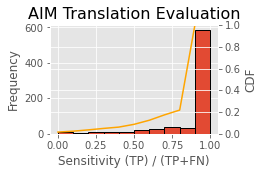

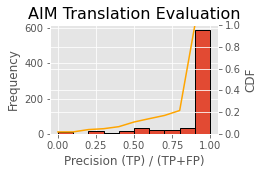

In [89]:
%matplotlib inline

#plot_hist(5) #Accuracy
plot_hist(6) #Sensitivity
#plot_hist(7) #Specificity
plot_hist(8) #Precision

# Finding the Number of mismatches per structure 
As each structure contains multiple chemotypes, we want to evaluate by looking at 
the (number of mismatches) / (number of total fragments) in a structure instead of doing the previous binary approach (any number of mismatch counts the same).

(1 mismatch / 10 total fragments) != (4 mismatch / 10 total fragments)


[49519, 11387, 3082, 715, 202, 66, 18, 11, 15, 20]


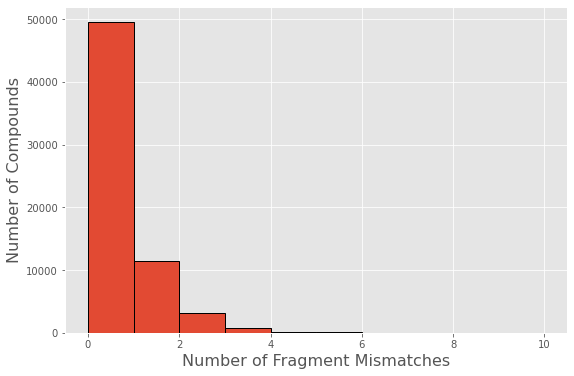

In [90]:
df_sub['Number_different'] = df_sub['Difference_aim_chemo'].apply(lambda x: len(x))

X = df_sub['Number_different']

plt.figure(figsize=(9,6))
n,bins,patches = plt.hist(X,bins=10,range=(0,10),linewidth=1,edgecolor='black')
int_list = [int(i) for i in n]
print(int_list)
plt.ylabel('Number of Compounds',fontsize=16)
plt.xlabel('Number of Fragment Mismatches',fontsize=16)
plt.savefig(figures_dir+'Figure3.png', dpi = 300)
#plt.title('Distribution of Mismatches',fontsize=22)

In [91]:
df_sub
df_sub['Total AIM'] = df_sub['AIM_list'].apply(lambda x: len(x))
df_sub['Total Chemo'] = df_sub['Chemotyper_list'].apply(lambda x: len(x))

sums = df_sub[['Total AIM','Number_different','Total Chemo']].sum(axis=0)


percent = (1-(sums[1]/sums[0]))*100
print(f'{percent:.2f}%')


96.00%


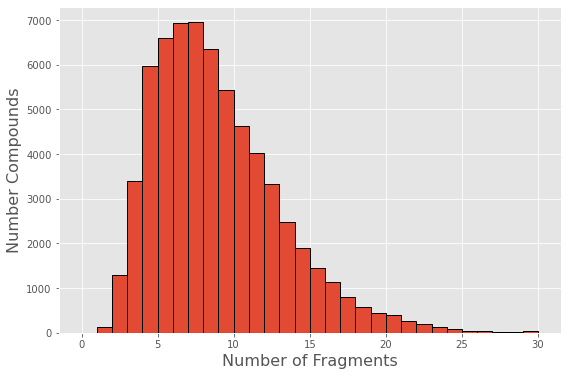

In [92]:
X = df_sub['Total AIM']
plt.figure(figsize=(9,6))

n,bins,patches = plt.hist(X,bins=30,range=(0,30),linewidth=1,edgecolor='black')
plt.ylabel('Number Compounds',fontsize=16)
plt.xlabel('Number of Fragments',fontsize=16)
#plt.title('Distribution of Fragments',fontsize=22)
plt.savefig(figures_dir+'Figure3b.png', dpi = 300)

In [93]:
df_chem = pd.read_csv(raw_dir+'AIM_V1_vs_AIMdb_fulllist.tsv', sep='\t')

df_0 = df_chem.copy()
df_0_sums = df_0.sum(numeric_only=True,axis=0)

def plot_loghist(x, bins,color):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    #plt.grid(axis='y', alpha=0.75)
    plt.figure(figsize = (9,6))
    plt.hist(x, bins=logbins,color=color,edgecolor='black',linewidth='1')
    plt.ylabel('Fragment Frequency')
    plt.xlabel('Number of Compounds')
    plt.xscale('log')
    plt.savefig(figures_dir+'Figure3.png', dpi = 300)
x = np.array(df_0_sums)
x = x[x!=0]

#plt.title('AIM Fragments')
#plot_loghist(x, 10,'skyblue')

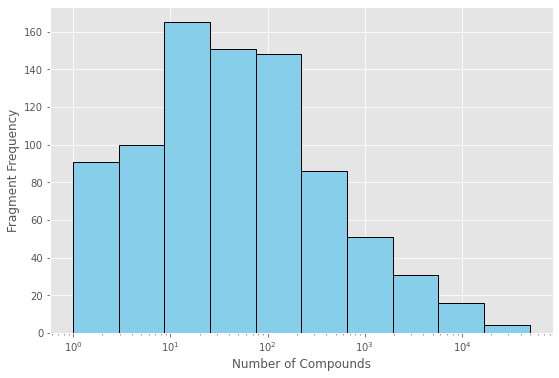

In [94]:
plot_loghist(x, 10,'skyblue')